<a href="https://colab.research.google.com/github/merlin-lacuna/stories-from-home-v1/blob/main/DataFile_Validator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title **STEP 1**: Clone the repo and install and/or import the dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('/content')
!git clone https://github.com/merlin-lacuna/stories-from-home-v1.git
os.chdir('/content/stories-from-home-v1')
!git pull
os.chdir('/content/stories-from-home-v1/data')
!pip install ruamel.yaml

Cloning into 'stories-from-home-v1'...
remote: Enumerating objects: 2896, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 2896 (delta 66), reused 64 (delta 24), pack-reused 2760
Receiving objects: 100% (2896/2896), 4.21 MiB | 11.32 MiB/s, done.
Resolving deltas: 100% (1814/1814), done.
Already up to date.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.2 MB/s 
     |████████████████████████████████| 555 kB 23.0 MB/s 


In [2]:
!git branch -a

* main
  remotes/origin/HEAD -> origin/main
  remotes/origin/add_data_bogota_landcover
  remotes/origin/add_data_florida_precipitation
  remotes/origin/add_data_ladoga_landcover
  remotes/origin/main


In [3]:
# Checkout Branch
!git checkout add_data_bogota_landcover
!git pull

#Check status
!git status

Branch 'add_data_bogota_landcover' set up to track remote branch 'add_data_bogota_landcover' from 'origin'.
Switched to a new branch 'add_data_bogota_landcover'
Already up to date.
On branch add_data_bogota_landcover
Your branch is up to date with 'origin/add_data_bogota_landcover'.

nothing to commit, working tree clean


In [4]:
#@title **STEP 1.1**: (Optional) List all of the current data files
csvs =sorted(os.listdir('/content/stories-from-home-v1/data/'))
for f in csvs:
  print(f)

.empty
_entity_template.yaml
_hongkongset
air_atmo_precip_toliara.csv
air_atmo_precip_toliara.doc.html
air_atmo_precip_toliara.yaml
earth_forest_lai_amazonas.csv
earth_forest_lai_amazonas.doc.html
earth_forest_lai_amazonas.yaml
earth_forest_lai_molaiforest.csv
earth_forest_lai_molaiforest.doc.html
earth_forest_lai_molaiforest.yaml
earth_glacier_ndsi_bhaturaglacier.csv
earth_glacier_ndsi_bhaturaglacier.yaml
earth_glacier_ndsi_furtwaenglerglacier.csv
earth_glacier_ndsi_furtwaenglerglacier.yaml
earth_glacier_ndsi_peritomorenoglacier.csv
earth_glacier_ndsi_peritomorenoglacier.yaml
earth_land_lai_atismo.csv
earth_land_lai_atismo.doc.html
earth_land_lai_atismo.yaml
earth_land_lai_blackforest.csv
earth_land_lai_blackforest.yaml
earth_land_landcover_bogota.csv
earth_land_landcover_bogota.yaml
earth_land_landcover_delhi.csv
earth_land_landcover_delhi.yaml
earth_land_landcover_dhaka.csv
earth_land_landcover_dhaka.yaml
earth_land_landcover_dubai.csv
earth_land_landcover_dubai.yaml
earth_land_land

In [5]:
#@title **STEP 2**: Input the name of the file that you just committed (including *.csv extension) - e.g. "`air_atmo_C02_manuloa.csv`" { display-mode: "form" }

file_name = 'earth_land_landcover_bogota.csv' #@param {type:"string"}
#file_name = input('Enter the file name: ')
file_name = file_name.strip()
#@markdown ...and run the cell

print("Using file name: " + file_name)

Using file name: earth_land_landcover_bogota.csv


**TIP**: If you just want to test the ideal values (and you've already tested the file and know that it works) you can jump straight to **Step 7**. 

In [6]:
#@title **STEP 3**: Check that the file can be processed correctly.
file_name = file_name.strip()
try:
  df = pd.read_csv("/content/stories-from-home-v1/data/" + file_name)
  print("Successfully imported.")
  print("DATA PREVIEW:")
  print(df.head())
except:
  print("Cannot import the file.")
  print("Is the final name correct? If you just committed it, refresh the repo by running STEP 1 again.")



Successfully imported.
DATA PREVIEW:
         Time       Data
0  2001-01-01  79.449541
1  2002-01-01  79.449541
2  2003-01-01  79.449541
3  2004-01-01  79.449541
4  2005-01-01  79.633028


In [7]:
#@title **STEP 4**: Check Column naming
print("\nChecking Column Names...\n")

try:
  timecol = df["Time"]
  print("Time column detected")
except:
  print("Cannot find a column called 'Time' - did you name it correctly?")

try:
  datacol = df["Data"]
  print("Data column detected")
except:
  print("Cannot find a column called 'Data' - did you name it correctly?")


Checking Column Names...

Time column detected
Data column detected


In [8]:
#@title **STEP 6** Check that the time format can be correctly indexed

import datetime as dt
import re

#timecol = df["Day"]
tsample = str(timecol.loc[1])

if re.match('\d{4}-\d{2}-\d{2}', tsample):
  print("Sample date in first row matches pattern")
else:
  print("The first line in the dataset does not match the pattern `YYYY-MM-DD` - are you sure it is correct?")

try:
  dft = df.copy()
  timecol = pd.to_datetime(timecol, infer_datetime_format=True)
  dft.set_index(timecol, inplace=True)
  print("Time Column Successfully Parsed as Dates")
  print(dft.index)
except:
  print("The column values could not be parsed as dates - are the numbers correct?")

Sample date in first row matches pattern
Time Column Successfully Parsed as Dates
DatetimeIndex(['2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', name='Time', freq=None)


In [9]:
#@title **STEP 7** Load the metadata from the YAML file (if exists)
import sys
from ruamel.yaml import YAML
#### LOAD ENTITY CONFIG
yamlfileexists = 0
try:
  yamlfile = file_name.replace('.csv','.yaml')
  configfile="/content/stories-from-home-v1/data/" + yamlfile
  print("yaml file exists: "+configfile)
  yamlfileexists = 1
except:
  print("Yaml file not found")

# yaml=YAML(typ='safe')
# yaml.default_flow_style = False
#with open(configfile, encoding='utf-8') as f:
#  econfig = yaml.load(f)
# print(econfig)

try:
  #### LOAD ENTITY CONFIG

  yaml=YAML(typ='safe')
  yaml.default_flow_style = False
  with open(configfile, encoding='utf-8') as f:
    econfig = yaml.load(f)
  try:
    ideallower = econfig['entitydata']['idealranges']['lower']
    print("Config contains lower ideal value of: " + str(ideallower))
    idealupper = econfig['entitydata']['idealranges']['upper']
    print("Config contains upper ideal value of: " + str(idealupper))
  except:
    print("One or more ideal values not defined properly")
    print(econfig)
  try:
    act1sample = econfig['entitydata']['actmoodsamples']['act1']
    print("Config contains act1 sample of: " + str(act1sample))
    act2sample = econfig['entitydata']['actmoodsamples']['act2']
    print("Config contains act2 sample of: " + str(act2sample))
    act3sample = econfig['entitydata']['actmoodsamples']['act3']
    print("Config contains act3 sample of: " + str(act3sample))
  except:
    print("One or more act samples not defined properly")
    print(econfig)

except:
  print("There was a problem parsing '" + configfile + "', falling back to metadata CSV")
  ### FALL BACK TO CHECKING FOR DATA IN CSV
  md = pd.read_csv("/content/stories-from-home-v1/data/metadata.csv", encoding="utf-8")
  md = md.reset_index()  # make sure indexes pair with number of rows
  matches = 0

  for index, row in md.iterrows():
    if row['Filename'] == file_name:
      matches = matches + 1

  if matches > 0:
    print("File name was successfully found in metadata")
    ideallower = row['Idealvaluelower']
    print("CSV contains lower ideal value of: " + str(ideallower))
    idealupper = row['Idealvalueupper']
    print("CSV contains upper ideal value of: " + str(idealupper))
  else:
    print("The file name was not found in the metadata, did you update the metadata file and commit it?")
    print("If you have committed updates to the metadata file, run STEP 1 again to update the repo.")

yaml file exists: /content/stories-from-home-v1/data/earth_land_landcover_bogota.yaml
Config contains lower ideal value of: None
Config contains upper ideal value of: None
Config contains act1 sample of: None
Config contains act2 sample of: None
Config contains act3 sample of: None


In [11]:
#@title **STEP 8**: Enter the ideal values and run the cell to store them { display-mode: "form" }

#@markdown Enter the LOWER bounds of the ideal range:
ideallower = 30 #@param {type:"number"}
#@markdown Enter the UPPER bounds of the ideal range:
idealupper = 37 #@param {type:"number"}

ideallower=float(ideallower)
idealupper=float(idealupper)

print("Using lower ideal value of: " + str(ideallower))
print("Using upper ideal value of: " + str(idealupper))


Using lower ideal value of: 30.0
Using upper ideal value of: 37.0


In [12]:
#@title **STEP 9**: Initialize chart by choosing your time unit{ display-mode: "form" }

#@markdown Set the unit of time for your (data so that interpolation works correctly) and run.

timeunit = 'months (interpolate by days)' #@param ["years (interpolate by month)", "months (interpolate by days)",  "days (interpolate by hours)"] {allow-input: true}


################ CHART STUFF #########################
print("initializing chart vizualization")
# Define important variables
filebase = "/content/stories-from-home-v1/data/"
files = [
    ("earth_land_ndsi_thwaites.csv", "Glacier", "ndsi", "ice mass","howling"), #0
    ("earth_land_lai_atismo.csv", "Forest", "lai", "leaf cover","lush and pensive"), #1
    ("air_atmo_airtemp_sahel.csv", "Land", "airtemp", "temperature","vast and complex"), #2
    ("fire_volcano_watertemp_ruapehu.csv", "Volcano", "temp", "temperature", "colossal and simmering"), #3
    ("fire_forestfire_nvdi_mendocino.csv", "Forest", "nvdi", "burning fire", "dry smouldering"), #4
    ("fire_volcano_watertemp_kawahIjen.csv", "Volcano", "temp", "temperature","colossal and simmering"), #5
    ("water_ocean_sealevel_balticsea.csv", "Ocean", "level", "sea level","iridescent rippled"), #6
    ("water_ocean_sealevel_biscay.csv", "Ocean", "level", "sea level","iridescent rippled"), #7
    ("air_atmo_precip_toliara.csv", "Land", "precip", "rainfall","vast and complex"), #8
    ("air_atmo_precip_timbuktu.csv", "Land", "precip", "rainfall","vast and complex"), #9
    ("earth_forest_lai_norr.csv", "Forest", "lai", "leaf cover","lush and pensive"), #10
    ("earth_valley_lcover_hainan.csv", "Island", "area","mass","fertile sultry"), #11
    ("earth_island_lcover_venice.csv", "Island", "area","mass","fertile sultry"), #12
    ("earth_glacier_ndsi_greenland.csv", "Glacier", "ndsi", "ice mass","howling"), #13
    ("air_atmo_C02_manuloa.csv", "Land", "C02", "carbon dioxide levels","clear and pristine"), #14
    ("earth_land_lai_taipokau.csv", "Forest", "lai", "leaf cover","lush and pensive") #15

]
# START CUSTOM PARAMS #####################################################################
fileno = 5
idealmin = ideallower
idealmax = idealupper
entitybio = "I am a test file."
# END CUSTOM PARAMS #####################################################################

myfile = file_name
file = pd.read_csv(filebase + myfile)
fn=myfile.replace(".csv","")
measurement = files[fileno][2]
measuredescr = files[fileno][3]
datacol = "Data"
timecol = "Time"

# START PREP STORY #####################################################################
sdf = pd.read_csv('/content/stories-from-home-v1/source_text/input_prompts.csv')
entity = files[fileno][1]
entityunit = entity.lower() + "_" + measurement
#print("entityunit: ",entityunit)
entityadjs =  files[fileno][4]


def get_prompt(skey,dmood,nmood):
    descr = "null"
    narr = "null"
    try:
        match = sdf.loc[sdf['0'] == skey]
        descr= match[dmood].tolist()[0]
        narr = match[nmood].tolist()[0]
    except:
        print("prompt not found")

    return(descr,narr)
# END PREP STORY #####################################################################


# Convert time to datetime and set date as index
df = file.copy()
df[timecol] = pd.to_datetime(df[timecol], infer_datetime_format=True)
df.set_index(timecol, inplace=True)
#print(df.head(4))

if timeunit == 'days (interpolate by hours)':
  # Interpolate between consistent HOURLY units if Daily
  df_interpol = df.resample('1H').mean()
  df_interpol[datacol] = df_interpol[datacol].interpolate()
else:
  if timeunit == 'months (interpolate by days)':
    # Interpolate between consistent HOURLY units if Daily
    df_interpol = df.resample('1H').mean()
    df_interpol[datacol] = df_interpol[datacol].interpolate()
  else:
    # Interpolate between consistent units- default is month for yearly data
    df_interpol = df.resample('M').mean()
    df_interpol[datacol] = df_interpol[datacol].interpolate()



nrmax = df_interpol[datacol].max()
nrmin = df_interpol[datacol].min()

# Divide data measurements into 5 sentiment zones based on entire data range
increment = (nrmax - nrmin) / 5
#print(increment)
possegments = [nrmin, nrmin + (increment * 1), nrmin + (increment * 2), nrmin + (increment * 3) , nrmin + (increment * 4), nrmax]
#print(possegments)

# Divide data measurements into 4 sentiment zones based on proximity to ideal
increment = (idealmax - idealmin) / 2
#print("increment: ",increment)
possegments = [
    idealmin + (increment * 1),
    idealmin + (increment * 2),
    idealmin + (increment * 3),
    idealmin + (increment * 4),
    idealmin + (increment * 5),
    idealmin + (increment * 6)
]
#print("possegments: ", possegments)

negsegments = [
    idealmin + (increment * 1),
    idealmin,
    idealmin - (increment * 1),
    idealmin - (increment * 2),
    idealmin - (increment * 3),
    idealmin - (increment * 4)
]
#print("negsegments: ", negsegments)

# Assess the mood of a datapoint based on the segment it belongs to
def check_segment(datapoint):
    mood="Unknown"
    color="black"
    if (possegments[0] <= datapoint <= possegments[1]) or (negsegments[0] >= datapoint >= negsegments[1]):
        mood = "Mood 5"
        color = 'turquoise'
        mscale = 500
    elif possegments[1] <= datapoint <= possegments[2] or (negsegments[1] >= datapoint >= negsegments[2]):
        mood = "Mood 4"
        color = 'olivedrab'
        mscale = 400
    elif possegments[2] <= datapoint <= possegments[3] or (negsegments[2] >= datapoint >= negsegments[3]):
        mood = "Mood 3"
        color = 'gold'
        mscale = 300
    elif possegments[3] <= datapoint <= possegments[4] or (negsegments[3] >= datapoint >= negsegments[4]):
        mood = "Mood 2"
        color = 'orangered'
        mscale = 200
    elif possegments[4] <= datapoint <= possegments[5] or (negsegments[4] >= datapoint >= negsegments[5]):
        mood = "Mood 1"
        color = 'darkred'
        mscale = 100
    elif possegments[5] < datapoint or negsegments[5] > datapoint:
         mood = "Mood 0"
         color = 'darkred'
         mscale = 100
    #print("mood: ",mood,"color: ",color,"scale: ",)

    return(mood, color, mscale)

# Divide time into 3 acts
tspan = df_interpol.index.max() - df_interpol.index.min()
tinc = tspan / 3
#print("Span, Increment: ",tspan, tinc)

# Calculate interesting values for each act
actavgs = []
actmins = []
actmaxs = []
#print("first act rows: ")
#print(df_interpol.loc[df_interpol.index.min():df_interpol.index.min()+tinc])
mean1 = df_interpol.loc[df_interpol.index.min():df_interpol.index.min()+tinc].mean()
mean1=mean1.values.tolist()[0]
min1 = df_interpol.loc[df_interpol.index.min():df_interpol.index.min()+tinc].min()
min1=min1.values.tolist()[0]
max1 = df_interpol.loc[df_interpol.index.min():df_interpol.index.min()+tinc].max()
max1=max1.values.tolist()[0]
actavgs.append(mean1)
actmins.append(min1)
actmaxs.append(max1)
#print(actavgs[0],actmins[0],actmaxs[0])

#print("second act rows: ")
#print(df_interpol.loc[df_interpol.index.min()+tinc:df_interpol.index.max()-tinc])
mean2 = df_interpol.loc[df_interpol.index.min()+tinc:df_interpol.index.max()-tinc].mean()
mean2=mean2.values.tolist()[0]
min2 = df_interpol.loc[df_interpol.index.min()+tinc:df_interpol.index.max()-tinc].min()
min2=min2.values.tolist()[0]
max2 = df_interpol.loc[df_interpol.index.min()+tinc:df_interpol.index.max()-tinc].max()
max2=max2.values.tolist()[0]
actavgs.append(mean2)
actmins.append(min2)
actmaxs.append(max2)
#print(actavgs[1],actmins[1],actmaxs[1])

#print("third act rows: ")
#print(df_interpol.loc[df_interpol.index.max()-tinc:df_interpol.index.max()])
mean3 = df_interpol.loc[df_interpol.index.max()-tinc:df_interpol.index.max()].mean()
mean3=mean3.values.tolist()[0]
min3 = df_interpol.loc[df_interpol.index.max()-tinc:df_interpol.index.max()].min()
min3=min3.values.tolist()[0]
max3 = df_interpol.loc[df_interpol.index.max()-tinc:df_interpol.index.max()].max()
max3 = max3.values.tolist()[0]
actavgs.append(mean3)
actmins.append(min3)
actmaxs.append(max3)
#print(actavgs[2],actmins[2],actmaxs[2])

# Prepare the plot
x = df_interpol.index
y = df_interpol[datacol]

if idealmin < y.min():
    ymin = idealmin
else:
    ymin= y.min()

if idealmax > y.max():
    ymax = idealmax
else:
    ymax= y.max()

# ACT1  - Use averages
act1meta = [x.min() + (tinc / 2), actavgs[0]]
if actmaxs[0] > (actavgs[0] * 1.15) or actmins[0] - (actavgs[0] * 0.85) :
    maxdiff = actmaxs[0] - actavgs[0]
    mindiff = actavgs[0] - actmins[0]

    if (abs(maxdiff)) > (abs(mindiff)):
        # Use maxes
        act1meta = [x.min() + (tinc / 2), actmaxs[0]]

    else:
        if (abs(maxdiff)) < (abs(mindiff)):
            # Use mins
            act1meta = [x.min() + (tinc / 2), actmins[0]]

# ACT2  - Use averages
act2meta = [x.min() + tinc + (tinc/2), actavgs[1]]
if actmaxs[1] > (actavgs[1] * 1.15) or actmins[1] - (actavgs[1] * 0.85) :
    maxdiff = actmaxs[1] - actavgs[1]
    mindiff = actavgs[1] - actmins[1]

    if (abs(maxdiff)) > (abs(mindiff)):
        # Use maxes
        act2meta = [x.min() + tinc + (tinc / 2), actmaxs[1]]

    if (abs(maxdiff)) < (abs(mindiff)):
        # Use mins
        act2meta = [x.min() + tinc + (tinc / 2), actmins[1]]

# ACT3  - Use averages
act3meta = [x.min() + tinc + tinc + (tinc/2), actavgs[2]]
if actmaxs[2] > (actavgs[2] * 1.15) or actmins[2] - (actavgs[2] * 0.85) :
    maxdiff = actmaxs[2] - actavgs[2]
    mindiff = actavgs[2] - actmins[2]
    if (abs(maxdiff)) > (abs(mindiff)):
        # Use maxes
        act3meta = [x.min() + tinc + tinc + (tinc/2), actmaxs[2]]
    if (abs(maxdiff)) < (abs(mindiff)):
        # Use mins
        act3meta = [x.min() + tinc + tinc + (tinc/2), actmins[2]]

print("Chart initialization completed")

# Use averages
# act1meta = [x.min() + (tinc/2), actavgs[0]]
# act2meta = [x.min() + tinc + (tinc/2), actavgs[1]]
# act3meta = [x.min() + tinc + tinc + (tinc/2), actavgs[2]]

initializing chart vizualization
Chart initialization completed


### STEP 9.1: *(Optional)* Override the automatic mood calculation by entering the sample values for each act.

Note, for scripts in this section to work, you need to run **step 8** first.

In [13]:
#@title - Reload existing values from YAML config (if present) { display-mode: "form" }

#@markdown Use this cell to replace all values you defined in the form below:

if yamlfileexists == 1:
  try:
    act1sample = econfig['entitydata']['actmoodsamples']['act1']
    print("Config contains act1 sample of: " + str(act1sample) + " -using that")
    act1sample = float(act1sample)
    act1meta = [x.min() + (tinc/2), act1sample]

    act2sample = econfig['entitydata']['actmoodsamples']['act2']
    print("Config contains act2 sample of: " + str(act2sample) + " -using that")
    act2sample = float(act2sample)
    act2meta = [x.min() + tinc + (tinc/2), act2sample]
    
    act3sample = econfig['entitydata']['actmoodsamples']['act3']
    print("Config contains act3 sample of: " + str(act3sample) + " -using that")
    act3sample = float(act3sample)
    act3meta = [x.min() + tinc + tinc + (tinc/2), act3sample]
  except:
    print("One or more act samples are not defined in YAML.")
    print("You can run the chart viz and let them be caclulated automatically or define them in the fields below")
else:
 print("Cant reload values because a YAML file doesnt exist yet")

Config contains act1 sample of: None -using that
One or more act samples are not defined in YAML.
You can run the chart viz and let them be caclulated automatically or define them in the fields below


In [27]:
#@title - Enter Act 1 Sample. { display-mode: "form" }

#@markdown Enter act 1 sample and run the cell:
act1sample = 0.10 #@param {type:"number"}

# act1sample = input('Enter sample value for Act 1: ')
act1sample = float(act1sample)
act1meta = [x.min() + (tinc/2), act1sample]

print(f"Using sample value of {act1sample} for Act 1")

Using sample value of 0.1 for Act 1


In [25]:
#@title - Enter Act 2 Sample. { display-mode: "form" }
#@markdown Enter act 2 sample and run the cell:
act2sample = 0.21 #@param {type:"number"}

# act2sample = input('Enter sample value for Act 2: ')
act2sample = float(act2sample)
act2meta = [x.min() + tinc + (tinc/2), act2sample]

print(f"Using sample value of {act2sample} for Act 2")

Using sample value of 0.21 for Act 2


In [23]:
#@title - Enter Act 3 Sample. { display-mode: "form" }
#@markdown Enter act 3 sample and run the cell:
act3sample = 0.05 #@param {type:"number"}
#act3sample = input('Enter sample value for Act 3: ')
act3sample = float(act3sample)
act3meta = [x.min() + tinc + tinc + (tinc/2), act3sample]

print(f"Using sample value of {act3sample} for Act 3")

Using sample value of 0.05 for Act 3


Lower ideal value: 30.0
Upper ideal value: 37.0
Mood Samples
act1:  79.63302752293579
act2:  80.16066414735128
act3:  80.36697247706422
Mood Samples:
act1:  Mood 0
act2:  Mood 0
act3:  Mood 0


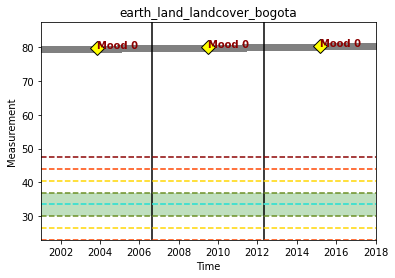

In [14]:
#@title **STEP 10** Vizualize the Data { display-mode: "form" }

plt.plot(x, y, color='gray', linestyle='--', marker='o')
plt.xlim([x.min(),x.max()])

# adjust chart range to be slightly bigger than value range
ysmin = ymin-(idealmax-idealmin)
ysmax = ymax+(idealmax-idealmin)

plt.ylim([ysmin,ysmax])
# plt.axhline(y=idealmin*0.98, color='hotpink', linestyle='-', linewidth=2)
# plt.axhline(y=idealmax*1.02, color='pink', linestyle='-',linewidth=2)

plt.axvline(x=x.min() + tinc, color='black', linestyle='-')
plt.axvline(x=x.max() - tinc, color='black', linestyle='-')

plt.axhline(y=possegments[4], color='darkred', linestyle='--')
plt.axhline(y=possegments[3], color='orangered', linestyle='--')
plt.axhline(y=possegments[2], color='gold', linestyle='--')
plt.axhline(y=possegments[1], color='olivedrab', linestyle='--')
plt.axhline(y=possegments[0], color='turquoise', linestyle='--')

plt.axhline(y=negsegments[4], color='darkred', linestyle='--')
plt.axhline(y=negsegments[3], color='orangered', linestyle='--')
plt.axhline(y=negsegments[2], color='gold', linestyle='--')
plt.axhline(y=negsegments[1], color='olivedrab', linestyle='--')
plt.axhline(y=negsegments[0], color='turquoise', linestyle='--')

plt.axhspan(idealmin, idealmax, facecolor='g', alpha=0.25)

print("Lower ideal value: " + str(ideallower))
print("Upper ideal value: " + str(idealupper))

#print("plotting act 1 info",(act1meta[0],act1meta[1]))
act1moodlevel = check_segment(act1meta[1])[0]
print("Mood Samples")
print("act1: ",act1meta[1])
plt.plot(act1meta[0],act1meta[1], marker="D", markersize=10, markeredgecolor="black", markerfacecolor="yellow")
plt.text(act1meta[0],act1meta[1],act1moodlevel,color=check_segment(act1meta[1])[1],weight="bold")

#print("plotting act 2 info",(act2meta[0],act2meta[1]))
act2moodlevel = check_segment(act2meta[1])[0]
print("act2: ",act2meta[1])
plt.plot(act2meta[0],act2meta[1], marker="D", markersize=10, markeredgecolor="black", markerfacecolor="yellow")
plt.text(act2meta[0],act2meta[1], act2moodlevel,color=check_segment(act2meta[1])[1],weight="bold")


#print("plotting act 3 info",(act3meta[0],act3meta[1]))
act3moodlevel = check_segment(act3meta[1])[0]
print("act3: ",act3meta[1])
plt.plot(act3meta[0],act3meta[1], marker="D", markersize=10, markeredgecolor="black", markerfacecolor="yellow")
plt.text(act3meta[0],act3meta[1], act3moodlevel,color=check_segment(act3meta[1])[1],weight="bold")

print("Mood Samples:")
print("act1: ",act1moodlevel)
print("act2: ",act2moodlevel)
print("act3: ",act3moodlevel)

title = fn
plt.title(title)
plt.xlabel("Time")
plt.ylabel("Measurement")
plt.show()

In [51]:
#@title **STEP 11** Show the new yaml configuration based on chart { display-mode: "form" }

try:
  econfig['entitydata']['idealranges']['lower'] = ideallower
  print("Writing to Config: lower ideal value of: " + str(ideallower))
  econfig['entitydata']['idealranges']['upper'] = idealupper
  print("Writing to Config: upper ideal value of: " + str(idealupper))
except:
  print("cant write ideal values")
try:
  # Try with hand-defined values
  econfig['entitydata']['actmoodsamples']['act1'] = act1sample
  econfig['entitydata']['actmoodlevels']['act1'] = int(act1moodlevel[-1:])
  print("Writing to Config: act1 sample of: " + str(act1sample))
  econfig['entitydata']['actmoodsamples']['act2'] = act2sample
  econfig['entitydata']['actmoodlevels']['act2'] = int(act2moodlevel[-1:])
  print("Writing to Config: act2 sample of: " + str(act2sample))
  econfig['entitydata']['actmoodsamples']['act3'] = act3sample
  econfig['entitydata']['actmoodlevels']['act3'] = int(act3moodlevel[-1:])
  print("Writing to Config: act3 sample of: " + str(act3sample))
except:
  try:
    # Fall back to auto-calculated values
    econfig['entitydata']['actmoodsamples']['act1'] = act1meta[1]
    #econfig['entitydata']['actmoodlevels']['act1'] = int(act1moodlevel[-1:])
    print("Writing to Config: act1 sample of: " + str(act1meta[1]))
    econfig['entitydata']['actmoodsamples']['act2'] = act2meta[1]
    #econfig['entitydata']['actmoodlevels']['act2'] = int(act2moodlevel[-1:])
    print("Writing to Config: act2 sample of: " + str(act2meta[1]))
    econfig['entitydata']['actmoodsamples']['act3'] = act3meta[1]
    #econfig['entitydata']['actmoodlevels']['act3'] = int(act3moodlevel[-1:])
    print("Writing to Config: act3 sample of: " + str(act3meta[1])) 
  except:
    print("cant write sample values")


#print("entitydata:")
try:
 print("\nCopy this YAML to the 'entitydata' section of your local file, then commit it:")
 print("-------------------------------")
 yaml.dump(econfig['entitydata'], sys.stdout)
 print("-------------------------------")
 print("\nThe full YAML file should look like this:")
 print("-------------------------------")
 yaml.dump(econfig, sys.stdout)
except:
 print("OOPS!") 
 print("Can't create new YAML yet- probably because no YAML file existed previously")
 print("For now you can copy and paste the printed values manually into a new YAML file")
 print("--------------")
 try:
   print("lower ideal value: " + str(ideallower))
   print("upper ideal value: " + str(idealupper))
 except:
  print("One or more ideal values not defined, nothing to show yet")
 try:
   print("Act1 sample: " + str(act1sample))
   print("Act2 sample: " + str(act2sample))
   print("Act3 sample: " + str(act3sample))
 except:
   print("One or more act samples not defined, as a fallback, take the auto-calculated ones displayed above the chart.")
 print("--------------")
 print("Will add a blank YAML template as fallback solution soon.")

Writing to Config: lower ideal value of: 0
Writing to Config: upper ideal value of: 40
Writing to Config: act1 sample of: 19
Writing to Config: act2 sample of: 115
Writing to Config: act3 sample of: 45

Copy this YAML to the 'entitydata' section of your local file, then commit it:
-------------------------------
actmoodlevels:
  act1: 4
  act2: 2
  act3: 5
actmoodsamples:
  act1: 19
  act2: 115
  act3: 45
chartstorage: null
idealranges:
  lower: 0
  upper: 40
measurementunit: precipitation
-------------------------------

The full YAML file should look like this:
-------------------------------
entitydata:
  actmoodlevels:
    act1: 4
    act2: 2
    act3: 5
  actmoodsamples:
    act1: 19
    act2: 115
    act3: 45
  chartstorage: null
  idealranges:
    lower: 0
    upper: 40
  measurementunit: precipitation
entitydescr:
  bio: null
  descriptor: null
  element: water
  id: water_land_precip_novafriburgo
  measurementdescr: precipitation
  type: land
prompt:
  act0descr: null
  act1de